<a href="https://colab.research.google.com/github/ekamresh/Binary-Image-Classifier/blob/main/image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)


In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/drive/MyDrive/Image Classifier/data'
img_exts = ['jpeg', 'jpg', 'png', 'bmp']

In [ ]:
os.listdir(data_dir)

['happy', 'sad']

In [ ]:
# for image_class in os.listdir(data_dir):
#   for image in os.listdir(os.path.join(data_dir, image_class)):
#     image_path = os.path.join(data_dir, image_class, image)
#     try:
#       img = cv2.imread(image_path)
#       tip = imghdr.what(image_path)
#       if tip not in img_exts:
#         print('Image not in ext list {}'.format(image_path))
#         os.remove(image_path)
#     except Exception as e:
#       print("Issue with image format {}".format(image_path))

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 168 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

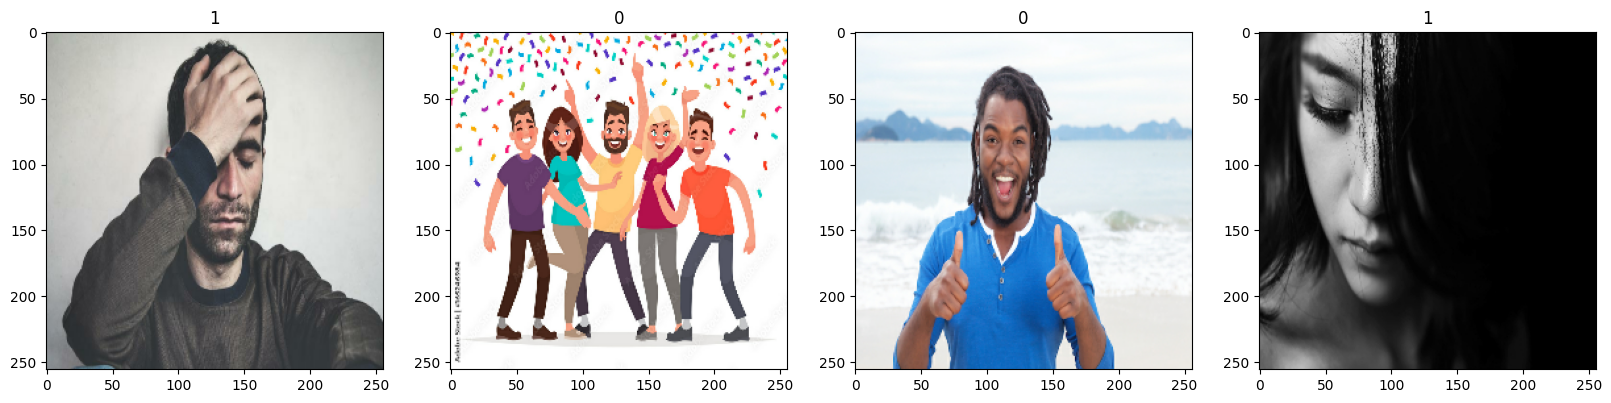

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x, y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.89411765, 0.9098039 , 0.92156863],
          [0.89411765, 0.9098039 , 0.92156863],
          [0.8948453 , 0.9105316 , 0.9222963 ],
          ...,
          [0.7696385 , 0.79708946, 0.8708716 ],
          [0.77254903, 0.8       , 0.8745098 ],
          [0.77254903, 0.8       , 0.8745098 ]],
 
         [[0.89411765, 0.9098039 , 0.92156863],
          [0.89436746, 0.91005373, 0.92181844],
          [0.896673  , 0.9123593 , 0.924124  ],
          ...,
          [0.7623274 , 0.78977835, 0.8635605 ],
          [0.7635723 , 0.7910233 , 0.8655331 ],
          [0.7635723 , 0.7910233 , 0.8655331 ]],
 
         [[0.8952436 , 0.91092986, 0.92269456],
          [0.8955548 , 0.91124105, 0.92300576],
          [0.8980392 , 0.9137255 , 0.9254902 ],
          ...,
          [0.7541117 , 0.7815627 , 0.8553449 ],
          [0.75348496, 0.78093594, 0.85544574],
          [0.75348496, 0.78093594, 0.85544574]],
 
         ...,
 
         [[0.6790316 , 0.67511004, 0.65942377],
          [0.73211

In [ ]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1)+1

In [ ]:
len(data)

6

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
logdir='/content/drive/MyDrive/Image Classifier/logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 17s 3s/step - loss: 0.9659 - accuracy: 0.4766 - val_loss: 0.6399 - val_accuracy: 0.6250
Epoch 2/20
4/4 [==============================] - 14s 3s/step - loss: 0.6476 - accuracy: 0.5547 - val_loss: 0.5983 - val_accuracy: 0.6875
Epoch 3/20
4/4 [==============================] - 13s 3s/step - loss: 0.6200 - accuracy: 0.6250 - val_loss: 0.5145 - val_accuracy: 0.7500
Epoch 4/20
4/4 [==============================] - 14s 3s/step - loss: 0.5065 - accuracy: 0.7500 - val_loss: 0.5568 - val_accuracy: 0.6562
Epoch 5/20
4/4 [==============================] - 15s 4s/step - loss: 0.4684 - accuracy: 0.8047 - val_loss: 0.2639 - val_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 15s 4s/step - loss: 0.3368 - accuracy: 0.8594 - val_loss: 0.4150 - val_accuracy: 0.8125
Epoch 7/20
4/4 [==============================] - 14s 3s/step - loss: 0.3367 - accuracy: 0.8359 - val_loss: 0.1701 - val_accuracy: 0.9375
Epoch 8/20
4/4 [==================

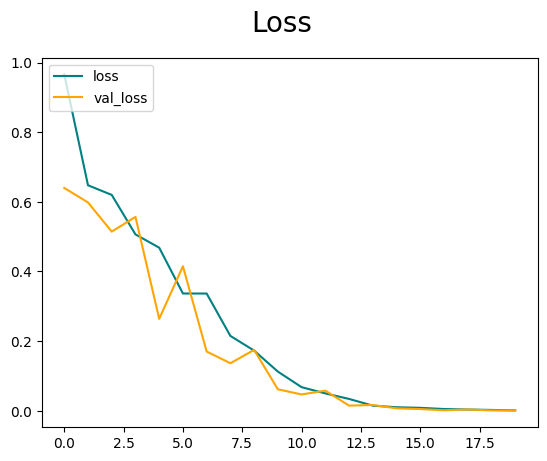

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

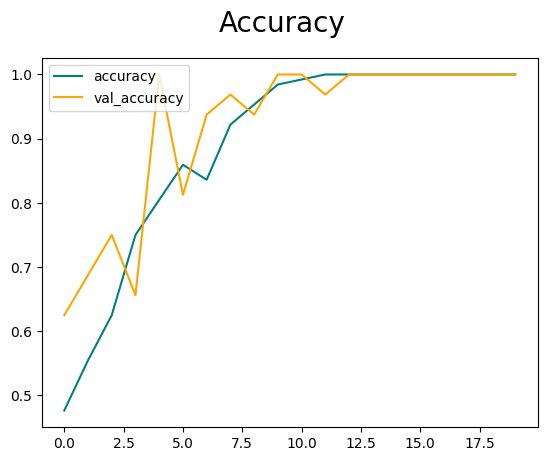

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
print(len(test))

1


In [ ]:
for batch in test.as_numpy_iterator():
  x, y = batch
  yhat = model.predict(x)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 242ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


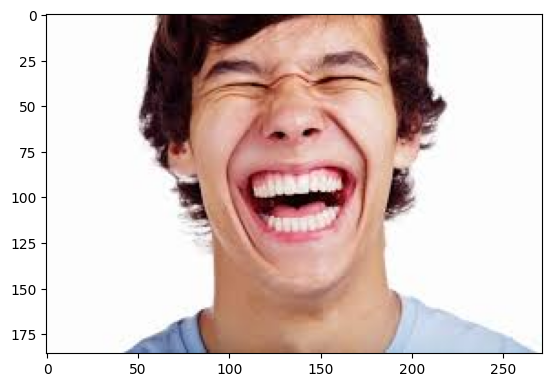

In [ ]:
happy_img = cv2.imread('/content/drive/MyDrive/Image Classifier/test/happy-guy.jpg')
happy_img = cv2.cvtColor(happy_img, cv2.COLOR_BGR2RGB)
plt.imshow(happy_img)
plt.show()

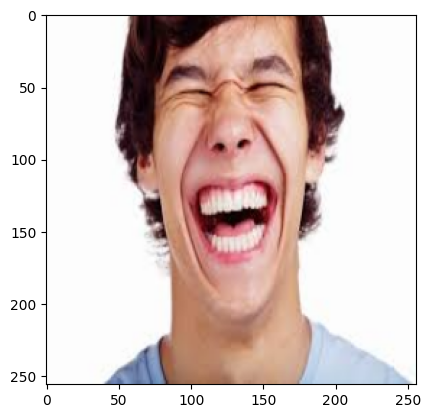

In [ ]:
resize_img = tf.image.resize(happy_img, (256,256))
plt.imshow(resize_img.numpy().astype(int))
plt.show()

In [ ]:
yhat_test = model.predict(np.expand_dims(resize_img / 255, 0))

1/1 [==============================] - 0s 39ms/step


In [ ]:
yhat_test

array([[0.46945712]], dtype=float32)

In [ ]:
def classify(yhat):
  if yhat > 0.5:
    print("Person is sad!")
  else:
    print("Person is happy :(")

In [ ]:
classify(yhat_test)

Person is happy :(


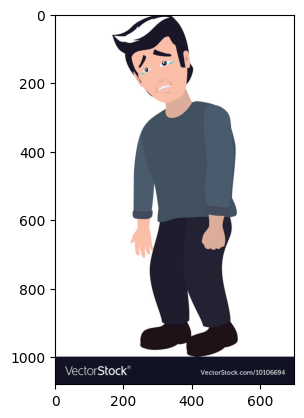

In [ ]:
sad_img = cv2.imread('/content/drive/MyDrive/Image Classifier/test/sad-guy.jpg')
sad_img = cv2.cvtColor(sad_img, cv2.COLOR_BGR2RGB)
plt.imshow(sad_img)
plt.show()

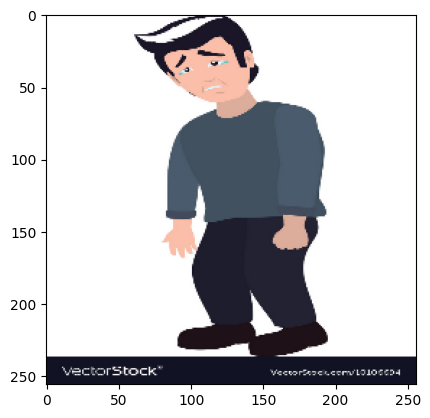

In [ ]:
resize_sad = tf.image.resize(sad_img, (256, 256))
plt.imshow(resize_sad.numpy().astype(int))
plt.show()

In [ ]:
yhat_test_sad = model.predict(np.expand_dims(resize_sad / 255, 0))

1/1 [==============================] - 0s 91ms/step


In [ ]:
yhat_test_sad

array([[0.99999815]], dtype=float32)

In [ ]:
classify(yhat_test_sad)

Person is sad!


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('/content/drive/MyDrive/Image Classifier/models', 'happysadmodel.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = load_model(os.path.join('/content/drive/MyDrive/Image Classifier/models', 'happysadmodel.h5'))

In [ ]:
yhat_out = new_model.predict(np.expand_dims(resize_img / 255, 0))

1/1 [==============================] - 0s 117ms/step


In [ ]:
classify(yhat_out)

Person is happy :(
